# Diamonds Data Exploration

## Preliminary Wrangling

This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.

In [202]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [203]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [204]:
# high-level overview of data shape and composition
print(df.shape)
print('-'*100)
print(df.dtypes)
print('-'*100)
print(df.head(10))

(183412, 16)
----------------------------------------------------------------------------------------------------
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
----------------------------------------------------------------------------------------------------
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560  

In [205]:
#Convert missassigned data types

# id columns into objects
df = df.apply(lambda col: col.astype('object') if 'id' in col.name else col)

# date columns into datetime
df = df.apply(lambda col: pd.to_datetime(col) if 'time' in col.name else col)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [206]:
# descriptive statistics for numeric variables
print(df.describe())

        duration_sec  start_station_latitude  start_station_longitude  \
count  183412.000000           183412.000000            183412.000000   
mean      726.078435               37.771223              -122.352664   
std      1794.389780                0.099581                 0.117097   
min        61.000000               37.317298              -122.453704   
25%       325.000000               37.770083              -122.412408   
50%       514.000000               37.780760              -122.398285   
75%       796.000000               37.797280              -122.286533   
max     85444.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  
count         183412.000000          183412.000000      175147.000000  
mean              37.771427            -122.352250        1984.806437  
std                0.099490               0.116673          10.116689  
min               37.317298            -122.453704    

### What is the structure of your dataset?

There are 183412 bike rides in ford GoBike sharing system with 16 entries each that describes the Ride details, The biker characteristics

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the most suitable way to make people use the Software more and the rides patterns

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on visual analysis I expect biker based details,location,Dates to help us alot as they describe the pattern of rides more than other features

## Univariate Exploration

I'll Start by visualizing Time patterns of rides 

In [207]:
#adding more time specific features


df['hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.day_name()
df.iloc[:5,-2:]

,hour,weekday
0,17,Thursday
1,18,Thursday
2,12,Thursday
3,17,Thursday
4,23,Thursday


0       925
1       548
2       381
3       174
4       235
5       896
6      3485
7     10614
8     21056
9     15903
10     8364
11     7884
12     8724
13     8551
14     8152
15     9174
16    14169
17    21864
18    16827
19     9881
20     6482
21     4561
22     2916
23     1646
Name: hour, dtype: int64
----------------------------------------------------------------------------------------------------


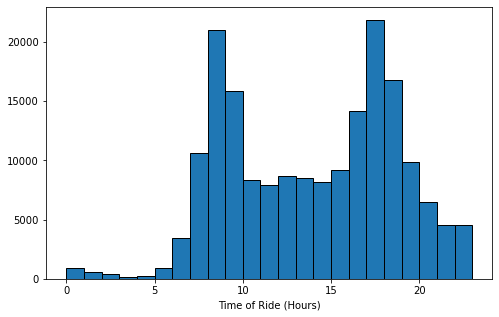

In [208]:
# start with a Histogram to find the distibution of the hours
binsize = 1  
bins = np.arange(0, df['hour'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'hour', bins=bins, edgecolor = "black")
plt.xlabel('Time of Ride (Hours)')

print(df['hour'].value_counts().sort_index())
print('-'*100)

plt.show()

We Can see that most rides are between 7-9 in the morning and 4-6 in the evening which means that the time of the ride is mostly adjusted to the work hours 


Now lets see the distribution of rides by weekday : day.

Friday       28981
Monday       26852
Saturday     15405
Sunday       15523
Thursday     35197
Tuesday      31813
Wednesday    29641
Name: weekday, dtype: int64
----------------------------------------------------------------------------------------------------


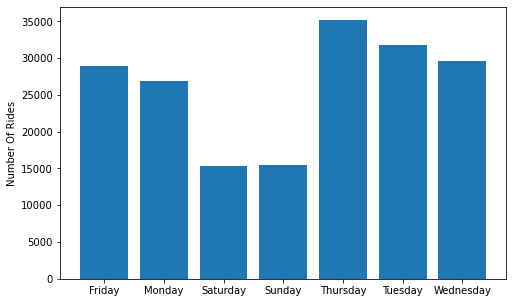

In [209]:
# plotting each Weekday
weekday_count = df['weekday'].value_counts().sort_index()

plt.figure(figsize=[8, 5])
plt.bar(data = weekday_count, x = weekday_count.index,height=weekday_count.values)
plt.ylabel('Number Of Rides')
print(weekday_count)
print('-'*100)
plt.show()

As expected the number of rides dropped at the weekend 

By investigating on the times of Rides based on hourse and days we can conclude that the rides are adjusted on the workday and we can safely put the assumption that most users are workers and we will investigate more on that by checking Age distribution


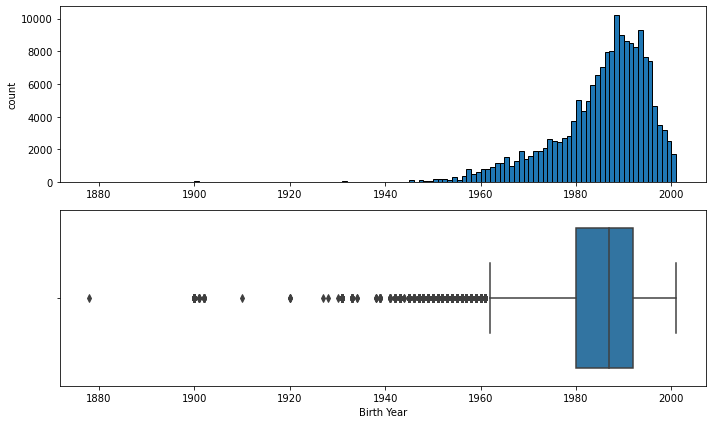

In [210]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_year=df['member_birth_year'].min()
max_year=df['member_birth_year'].max()

binsize = 1
bins = np.arange(min_year,max_year + binsize, binsize)
axes[0].hist(data=df, x='member_birth_year', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='member_birth_year', ax=axes[1])

plt.xlabel('Birth Year')
plt.tight_layout()
plt.show()

we can see there's some outliers in the years which are unrealistic and needs to be filtered whoever we won't remove the row we can set the value as a nan so it won't cause disortion in the data

In [211]:
#set year less than 1950 as nan
df[df['member_birth_year'] < 1940] = np.nan

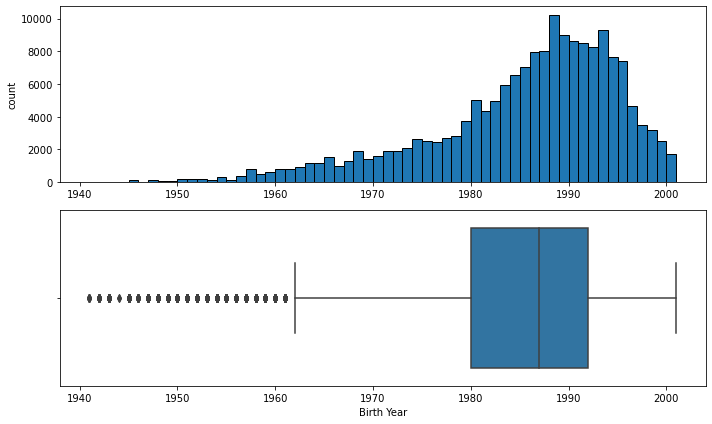

In [212]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_year=df['member_birth_year'].min()
max_year=df['member_birth_year'].max()

binsize = 1
bins = np.arange(min_year,max_year + binsize, binsize)
axes[0].hist(data=df, x='member_birth_year', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='member_birth_year', ax=axes[1])

plt.xlabel('Birth Year')
plt.tight_layout()
plt.show()

as expected the age is mostly between 1980-late 90s which is in the range of san francisco workforce age 25-55 (https://www.ppic.org/publication/who-are-californias-workers/) 

now lets see if there's a correlation between the age of the rider and the time of the ride to see it from a different prespective 

In [213]:
#assigning users into age groups

current_year = 2017  
df['age'] = current_year - df['member_birth_year']
ageborder = [20, 30, 40, 50, 55, 70, 80] 
labels = ['20-29', '30-39', '40-49', '50-55', '55-69', '70-']
df['age_group'] = pd.cut(df['age'], bins=ageborder, labels=labels)  

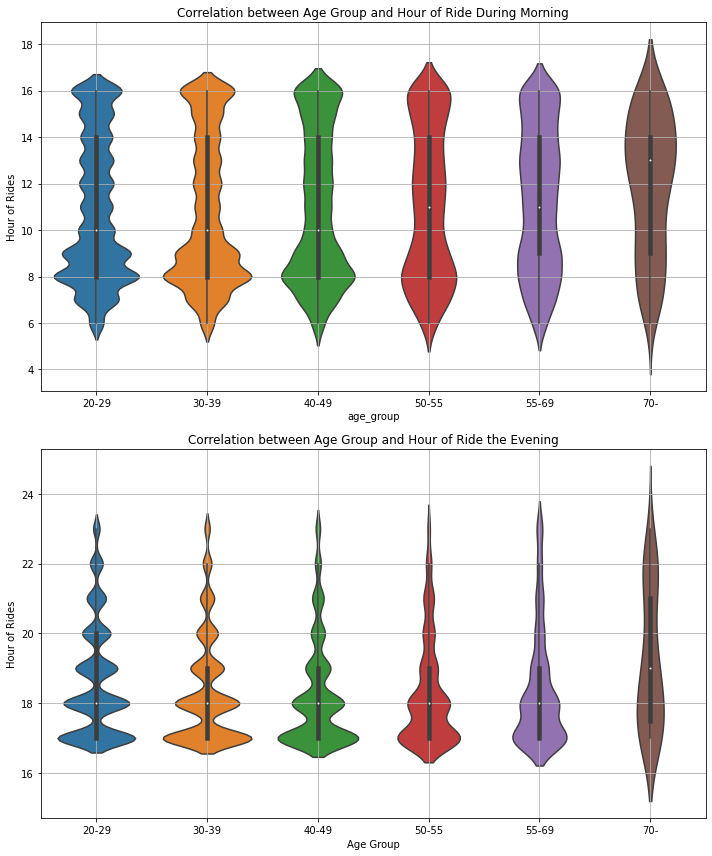

In [214]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Correlation in the morning
df_morning = df[(df['hour'] >= 6) & (df['hour'] <= 16)]
sns.violinplot(data=df_morning, x='age_group', y='hour', ax=axes[0])
axes[0].set_title('Correlation between Age Group and Hour of Ride During Morning')
axes[0].set_ylabel('Hour of Rides')
axes[0].grid(True)

# Correlation in the evening
df_evening = df[ (df['hour'] > 16)]
sns.violinplot(data=df_evening, x='age_group', y='hour', ax=axes[1])
axes[1].set_title('Correlation between Age Group and Hour of Ride the Evening')
axes[1].set_ylabel('Hour of Rides')
axes[1].set_xlabel('Age Group')
axes[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

using violin plot to visualize the relation between the age group and the hour of the ride during the evening and the morning and we can see that in age groups between 20-50 the correlation is higher while in the rest it's more distiributed

now lets Move to Ride Duration and analyze it

In [215]:
#change it to minutes for easier observation and a better scale

df['ride_duration'] = df['duration_sec'] / 60
df.drop(columns=['duration_sec'], inplace=True)


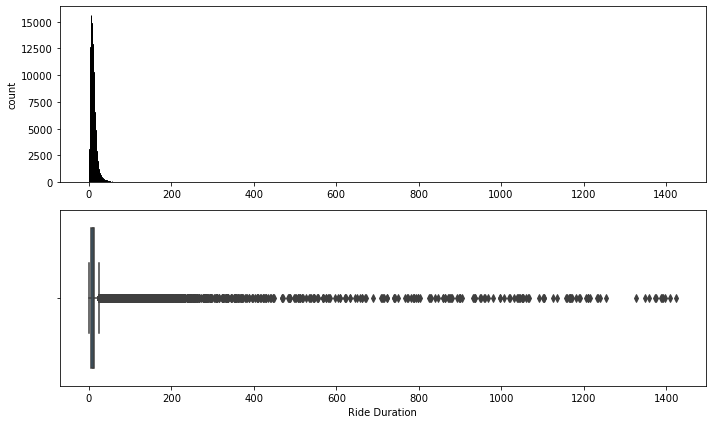

In [244]:
# distribution of ride duration
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_duration = df['ride_duration'].min() 
max_duration = df['ride_duration'].max()

binsize = 1
bins = np.arange(min_duration, max_duration + binsize, binsize)
axes[0].hist(data=df, x='ride_duration', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='ride_duration', ax=axes[1])

plt.xlabel('Ride Duration')
plt.tight_layout()
plt.show()

the data looks extremely skewed so we'll try using the mean (12 minutes) as estimation to avoid the outliers without removing them as they may indicate other things 

we'll set the range to 60 minutes as by looking at the mean and the 3rd quartile range (15 min) the data seems to be left skewed and most of the values would fall in that range

In [262]:


# Filter out outliers
filtered_df = df[(df['ride_duration'] < 60)]
outliers =df[~((df['ride_duration'] < 60))]

In [263]:
outliers.shape

(1913, 21)

there's 1913 outliers which are 5% of the data and they can represent the rides in which riders didn't end the ride until later on and they

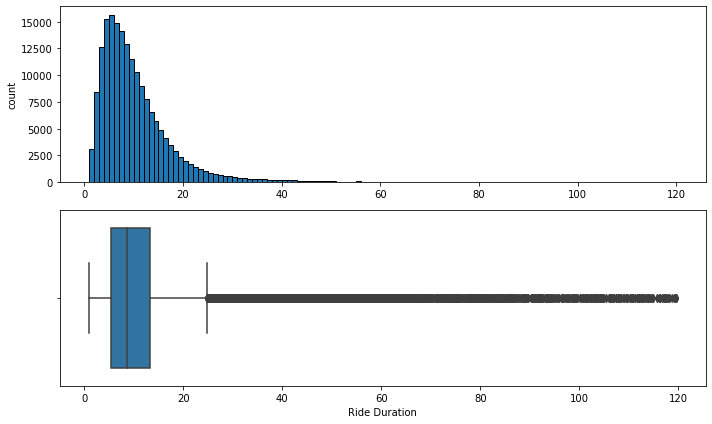

In [247]:
# distribution of ride duration after filtering
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_duration = filtered_df['ride_duration'].min() 
max_duration = filtered_df['ride_duration'].max()

binsize = 1
bins = np.arange(min_duration, max_duration + binsize, binsize)
axes[0].hist(data=filtered_df, x='ride_duration', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=filtered_df, x='ride_duration', ax=axes[1])

plt.xlabel('Ride Duration')
plt.tight_layout()
plt.show()

We can see that most rides are within 5-10 minutes which indicates that most riders use the bike for closer trips however some riders use it for 20+ minutes rides which can have a correlation with the walkability of the district or 

NameError: name 'diamonds' is not defined

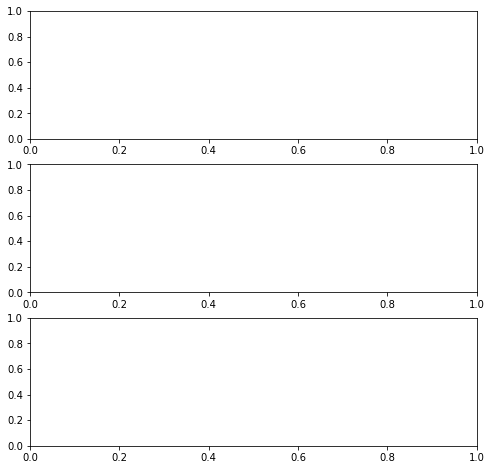

In [182]:
# let's start with the major dimensions of the diamonds, with x, y, and z.

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

variables = ['x', 'y', 'z']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.2, 0.2)
    ax[i].hist(data = diamonds, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

The initial plot of the x, y, and z features show some immediate points of attention. On the y and z plots, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The left limits of all three plots also suggest that there are some points that take unusually small values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [ ]:
# select low outliers, using criteria eyeballed from the plots

low_outliers = (diamonds['x'] < 3.5) | (diamonds['y'] < 3.5) | (diamonds['z'] < 2)

print(low_outliers.sum())
print(diamonds.loc[low_outliers,:])

There are 23 outliers with unusually low values for x, y, or z. Most of them have a 0 value for z, some of them also have a 0 value for x or y. The three diamonds that don't have a 0 value have a z-value that actually matches their carat instead. There might have been an error in data input. Interestingly, these diamonds tend to be fairly high in price, most of them above the median and over half above the third quartile.

In [ ]:
# select high outliers, using criteria eyeballed from the plots

high_outliers = ((diamonds['y'] > 10) | (diamonds['z'] > 6))
print(high_outliers.sum())
print(diamonds.loc[high_outliers,:])

Most of the high outliers appear to be valid points, with the exception of the three points with extreme values in the y and z variables. As a final outlier check, since 'table' is the ratio of z to the average of x and y ((2\*z)/(x+y)), we can see how many points do not have a matching calculated value.

In [14]:
# select points whose depth value does not match x, y, and z values.

incorrect_depth = (np.abs(2 * diamonds['z'] / (diamonds['x'] + diamonds['y']) - diamonds['depth']/100) > 0.1)
no_size_info = ((diamonds['x'] == 0) & (diamonds['y'] == 0))
print(diamonds.loc[incorrect_depth | no_size_info,['carat','depth','x','y','z']])

       carat  depth     x      y      z
2207    1.00   59.1  6.55   6.48   0.00
2314    1.01   58.1  6.66   6.60   0.00
2941    1.00   62.8  6.26   6.19   3.19
4518    1.00   43.0  6.32   6.27   3.97
4791    1.10   63.0  6.50   6.47   0.00
5471    1.01   59.2  6.50   6.47   0.00
6341    1.00   44.0  6.31   6.24   4.12
10167   1.50   64.0  7.15   7.04   0.00
10377   1.09   43.0  6.53   6.55   4.12
11182   1.07   61.6  0.00   6.62   0.00
11963   1.00   63.3  0.00   0.00   0.00
13601   1.15   59.2  6.88   6.83   0.00
14635   1.07   60.6  6.62   6.67   1.07
15951   1.14   57.5  0.00   0.00   0.00
19502   1.57   67.3  7.85   5.75   3.87
20694   1.53   61.9  7.43   7.50   1.53
21654   1.41   60.7  7.31   7.22   1.41
24067   2.00   58.9  8.09  58.90   8.06
24394   2.18   59.4  8.49   8.45   0.00
24520   1.56   62.2  0.00   0.00   0.00
25849   2.00   59.0  6.16   6.15   4.82
26123   2.25   61.3  8.52   8.42   0.00
26194   2.01   65.6  7.89   7.84   6.16
26243   1.20   62.1  0.00   0.00   0.00


This check captures not only the 26 outliers that were identified above, but a number of other points that had conflicting information. For safety, I'll remove all of these inconsistent points from the data. Then, I'll recreate the plots of x, y, and z.

In [15]:
# remove points with inconsistent depth values.
diamonds = diamonds.loc[-incorrect_depth & -no_size_info,:]

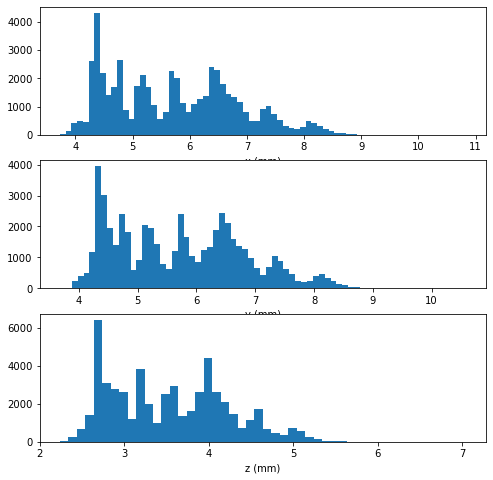

In [16]:
# re-plot the distribution of x, y, and z.
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

variables = ['x', 'y', 'z']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.1, 0.1)
    ax[i].hist(data = diamonds, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

Interestingly, the shape of the x, y, and z distributions are very similar to one another. The z distribution just looks slightly different since it takes a smaller range of values, and so the bins are larger in a relative sense. It's likely that these variables will be highly correlated with one another, and probably have a strong correlation with carat.

Before closing this section, we'll take a look at the last two variables: depth and table.

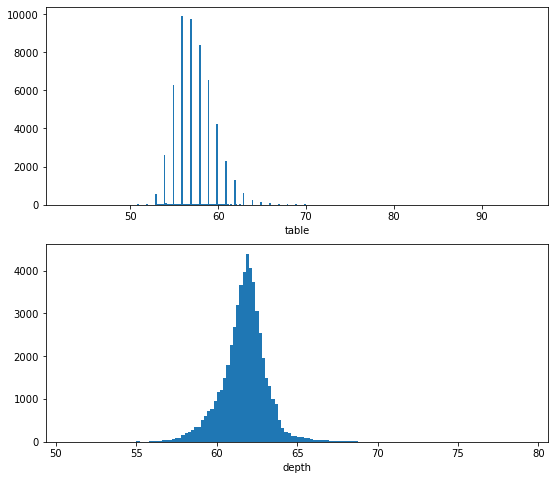

In [17]:
# re-using code to plot depth and table.
fig, ax = plt.subplots(nrows=2, figsize = [9,8])

variables = ['table', 'depth']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.2, 0.2)
    ax[i].hist(data = diamonds, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

Both table and depth are unimodal, but the distributions are slightly skewed and look a little narrower than a normal distribution. Table is slightly skewed right, while depth is slightly skewed left; I wonder if they're negatively correlated. Table is also a discrete numeric variable.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between \$500 and \$1000, and another just below \$5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the x, y, and z size variables, a number of outlier points were identified. Overall, these points can be characterized by an inconsistency between the recorded value of depth, and the value that would be derived from using x, y, and z. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [18]:
numeric_vars = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categoric_vars = ['cut', 'color', 'clarity']

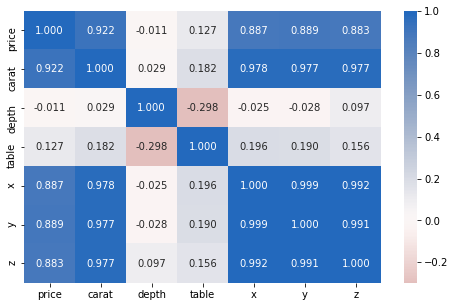

In [19]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(diamonds[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

diamonds.shape= (53901, 10)
diamonds_samp.shape= (500, 10)


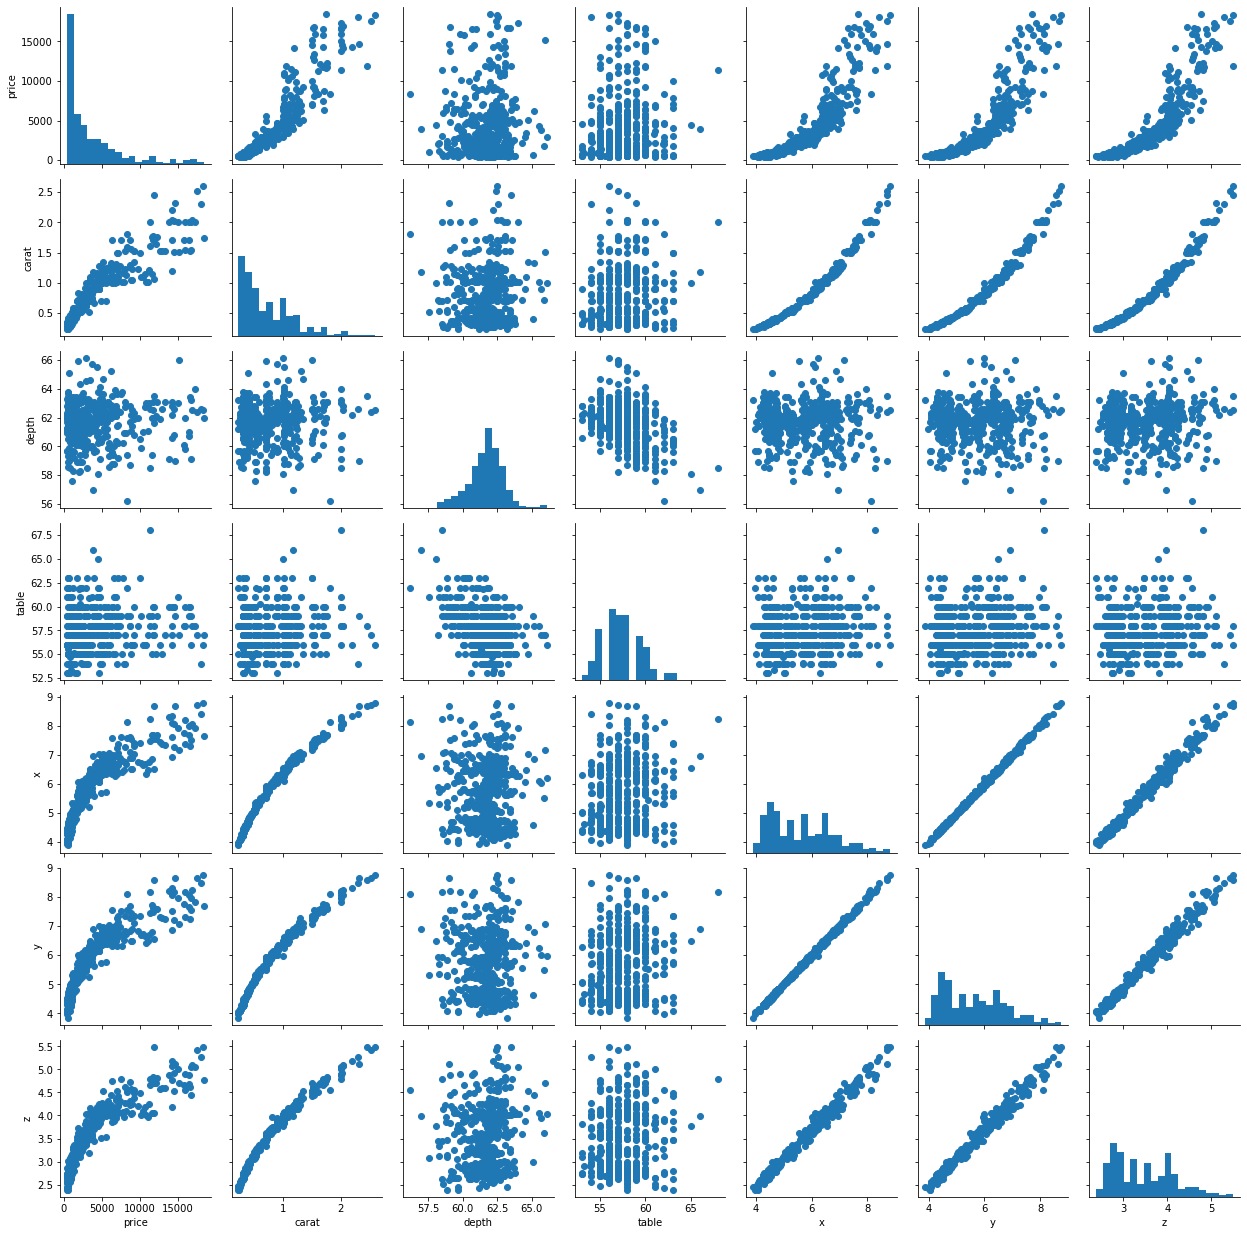

In [20]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("diamonds.shape=",diamonds.shape)
diamonds_samp = diamonds.sample(n=500, replace = False)
print("diamonds_samp.shape=",diamonds_samp.shape)

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, the 'x', 'y', and 'z' dimensions are all highly correlated with one another, and all of them are also highly correlated with carat. Since carat is a measure of diamond size, it's not too surprising that the overall trend between carat and the three individual dimensions appears polynomial. In addition, since all the diamonds are round-cut, it makes sense that the 'x', 'y', and 'z' sizes would all move proportionally together.

Surprisingly, the correlation coefficient between price and carat is very high, despite the fact that price has such a large range of values. This will be worth extra exploration in this section. Depth and table don't have strong correlations with any other numeric variables in the dataset, and we see the moderate negative correlation hypothesized in the previous section. I won't perform any further analyses with these variables since they don't look like they'll be of much further interest.

Let's move on to looking at how price and carat weight correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

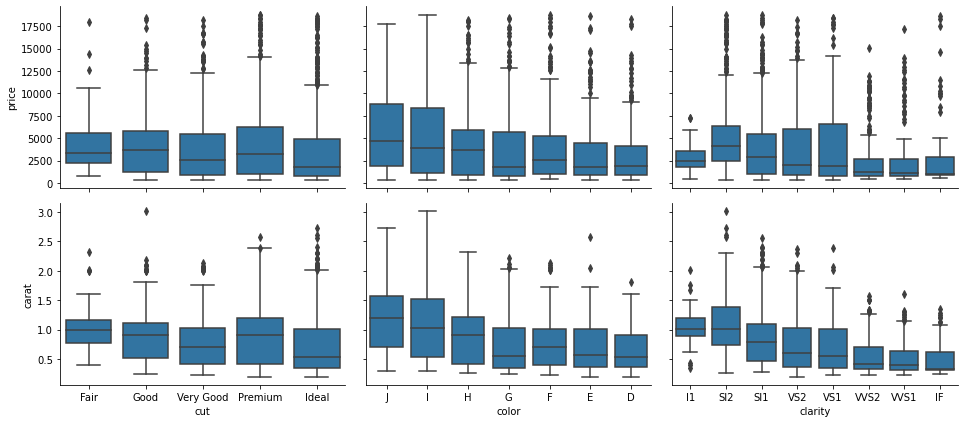

In [21]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)
# diamonds_samp = diamonds.loc[samples,:]

diamonds_samp = diamonds.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = ['price', 'carat'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Interestingly, it appears that there are some negative relationships between the categorical variables and the two numeric variables of interest. The diamonds with the best features (Ideal cut, color D, clarity IF) seem to get the lowest prices, but also tend to be smaller on average. This will be worth investigating more later on, using the full data.

Finally, let's look at relationships between the three categorical features.

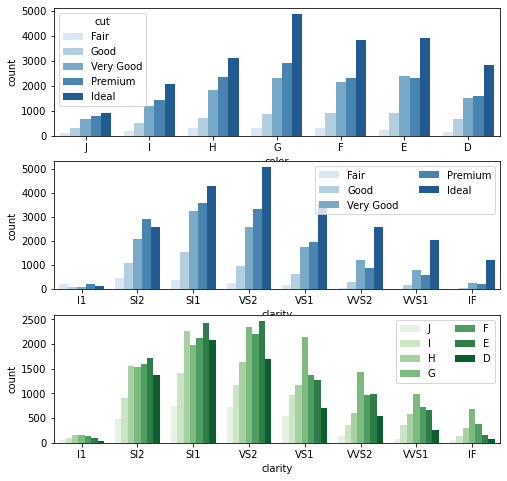

In [22]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = diamonds, x = 'color', hue = 'cut', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = diamonds, x = 'clarity', hue = 'cut', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = diamonds, x = 'clarity', hue = 'color', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

There doesn't seem to be that much interaction between diamond color and cut, though proportionally it seems like there might be more "Very Good" and "Premium" diamonds on the better color grades (F, E, and D). There are slightly larger interactions on the clarity grades, especially the lower levels of SI2, SI1, and VS2. It looks like there are more Very Good and Premium cut diamonds and more G, F, and E color diamonds compared to higher clarity grades.

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how price and carat are related to one another for all of the data, and to plot price on a log scale.

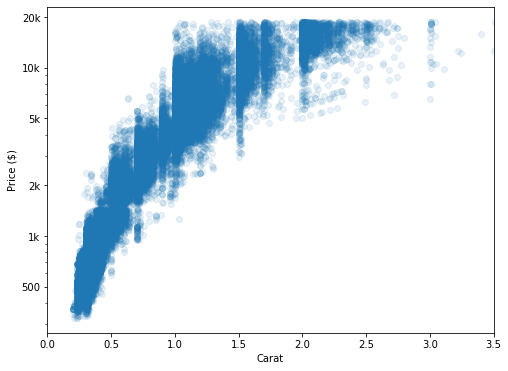

In [23]:
# scatter plot of price vs. carat, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'carat', y = 'price', alpha = 1/10)
plt.xlim([0, 3.5])
plt.xlabel('Carat')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')
plt.show()

This plot suggests from the concavity that we might want to also transform the 'carat' variable to see a linear
trend. There also appears to be a price ceiling in the data: given the spread of prices for carat values less than 1.5, we'd expect the prices to be more spread out for carat sizes greater than 1.5 and to see diamonds of value higher than $20k.

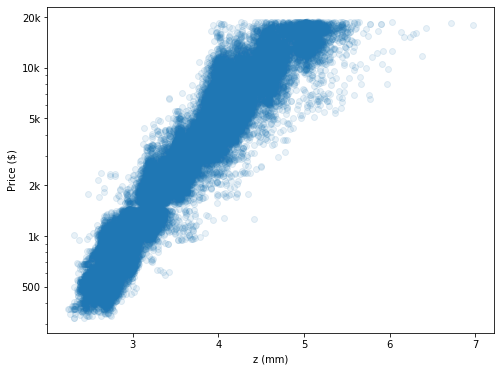

In [24]:
# since x, y, and z have a polynomial relationship with carat, let's see how
# one of them correlates with price.
plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'z', y = 'price', alpha = 1/10)
plt.xlabel('z (mm)')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')
plt.show()

Plotting one of the size dimensions against price generates a relationship that looks much more linear. I'll write a function to perform the cube root and its inverse (just cubing) so I can create this kind of plot on carat. Carat is preferable to 'x', 'y', or 'z' for its general audience interpretability.

In [25]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

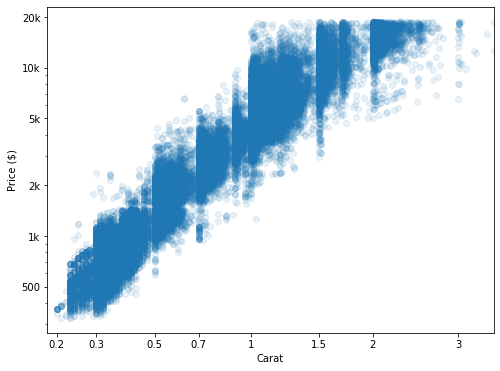

In [26]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha = 1/10)

carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
plt.xlim([cuberoot_trans(.18), cuberoot_trans(3.5)])
plt.xlabel('Carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

plt.show()

Now, let's take a second look at the price and carat distributions on the three categorical variables: cut, color, and clarity.

In [27]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

diamonds['log_price'] = diamonds['price'].apply(log_trans)

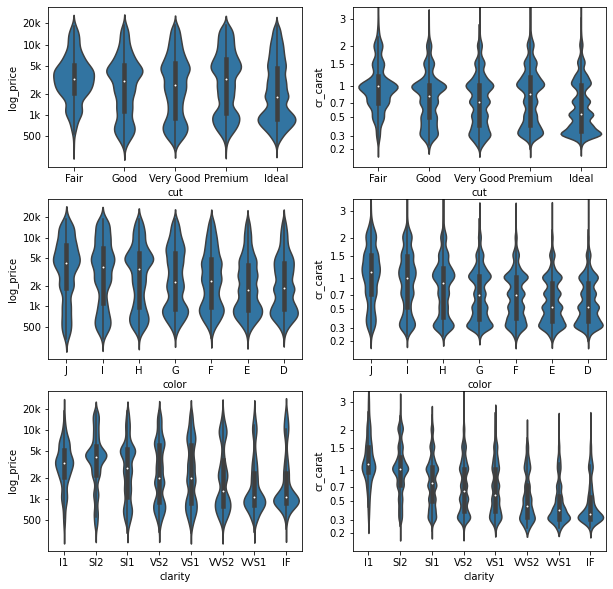

In [28]:
# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = diamonds, x = var, y = 'log_price', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    sb.violinplot(data = diamonds, x = var, y = 'cr_carat', ax = ax[i,1],
               color = default_color)
    ax[i,1].set_yticks(cuberoot_trans(np.array(carat_ticks)))
    ax[i,1].set_yticklabels(carat_ticks)
    ax[i,1].set_ylim(cuberoot_trans(np.array([0.1, 3.5])))

plt.show()

The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It is highly suggested that the decrease in average price across increasing quality is due to the average diamond size decreasing with increasing quality. This is clearest in the plots across clarity, moderately visible with cut, and least evident with color. It will be interesting to see how the categories map in the multivariate analysis.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Price had a surprisingly high amount of correlation with the diamond size, even before transforming the features. An approximately linear relationship was observed when price was plotted on a log scale and carat was plotted with a cube-root transform. The scatterplot that came out of this also suggested that there was an upper bound on the diamond prices available in the dataset, since the range of prices for the largest diamonds was much narrower than would have been expected, based on the price ranges of smaller diamonds.

There was also an interesting relationship observed between price and the categorical features. For all of cut, color, and clarity, lower prices were associated with increasing quality. One of the potentially major interacting factors is the fact that improved quality levels were also associated with smaller diamonds. This will have to be explored further in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found in the association between the 'x', 'y', and 'z' measurements of diamonds to the other linear dimensions as well as to the 'carat' variable. A small negative correlation was observed between table size and depth, but neither of these variables show a strong correlation with price, so they won't be explored further. There was also a small interaction in the categorical quality features. Diamonds of lower clarity appear to have slightly better cut and color grades.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

In [29]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
    plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
               [500, '1k', '2k', '5k', '10k', '20k'])

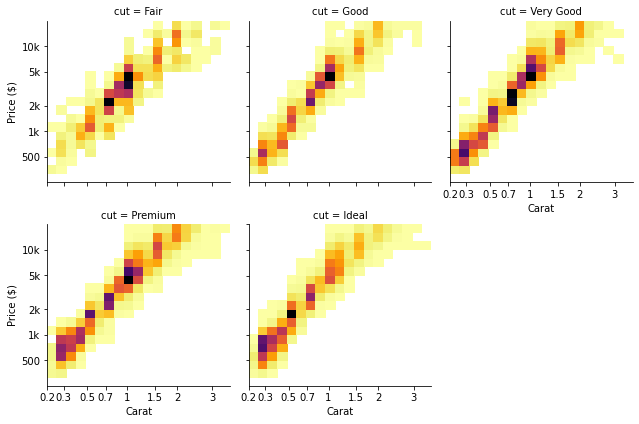

In [30]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = diamonds, col = 'cut', col_wrap = 3, height = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

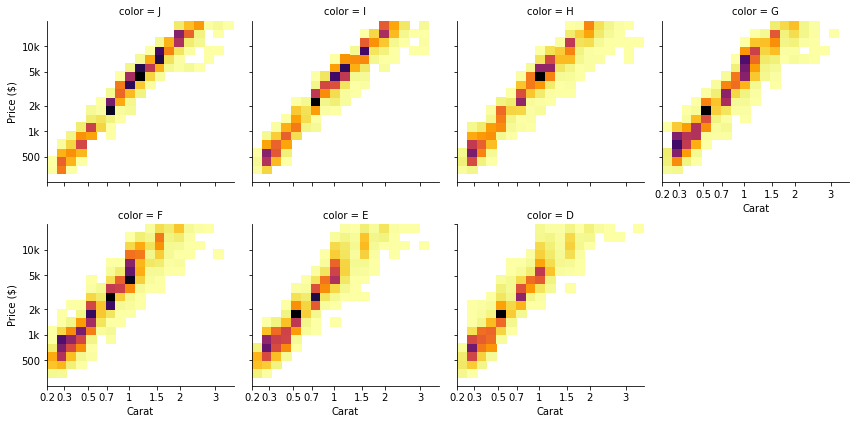

In [31]:
# create faceted heat maps on levels of the color variable
g = sb.FacetGrid(data = diamonds, col = 'color', col_wrap = 4, height = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

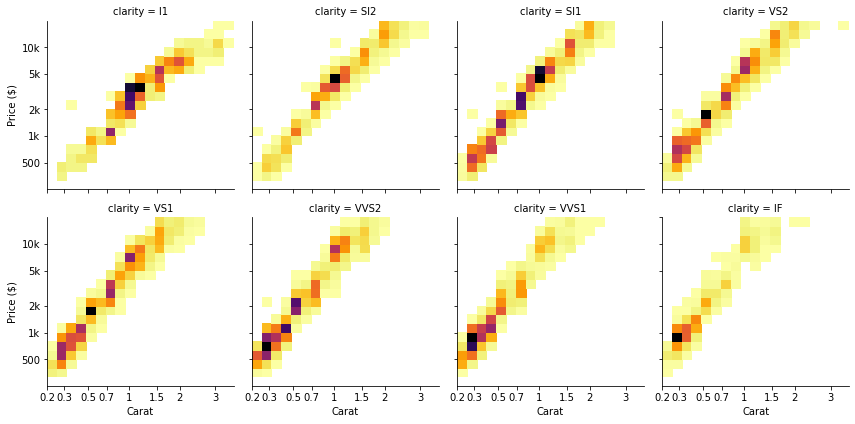

In [32]:
# create faceted heat maps on levels of the clarity variable
g = sb.FacetGrid(data = diamonds, col = 'clarity', col_wrap = 4, height = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

In each of the faceted heat maps, you can see the relationship of quality level against price and diamond size, to varying levels of effectiveness. As the quality level increases, the 'cloud' of points moves towards the upper left of the plot, thus showing increased prices but also smaller diamonds. This is clearest in the clarity plot.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


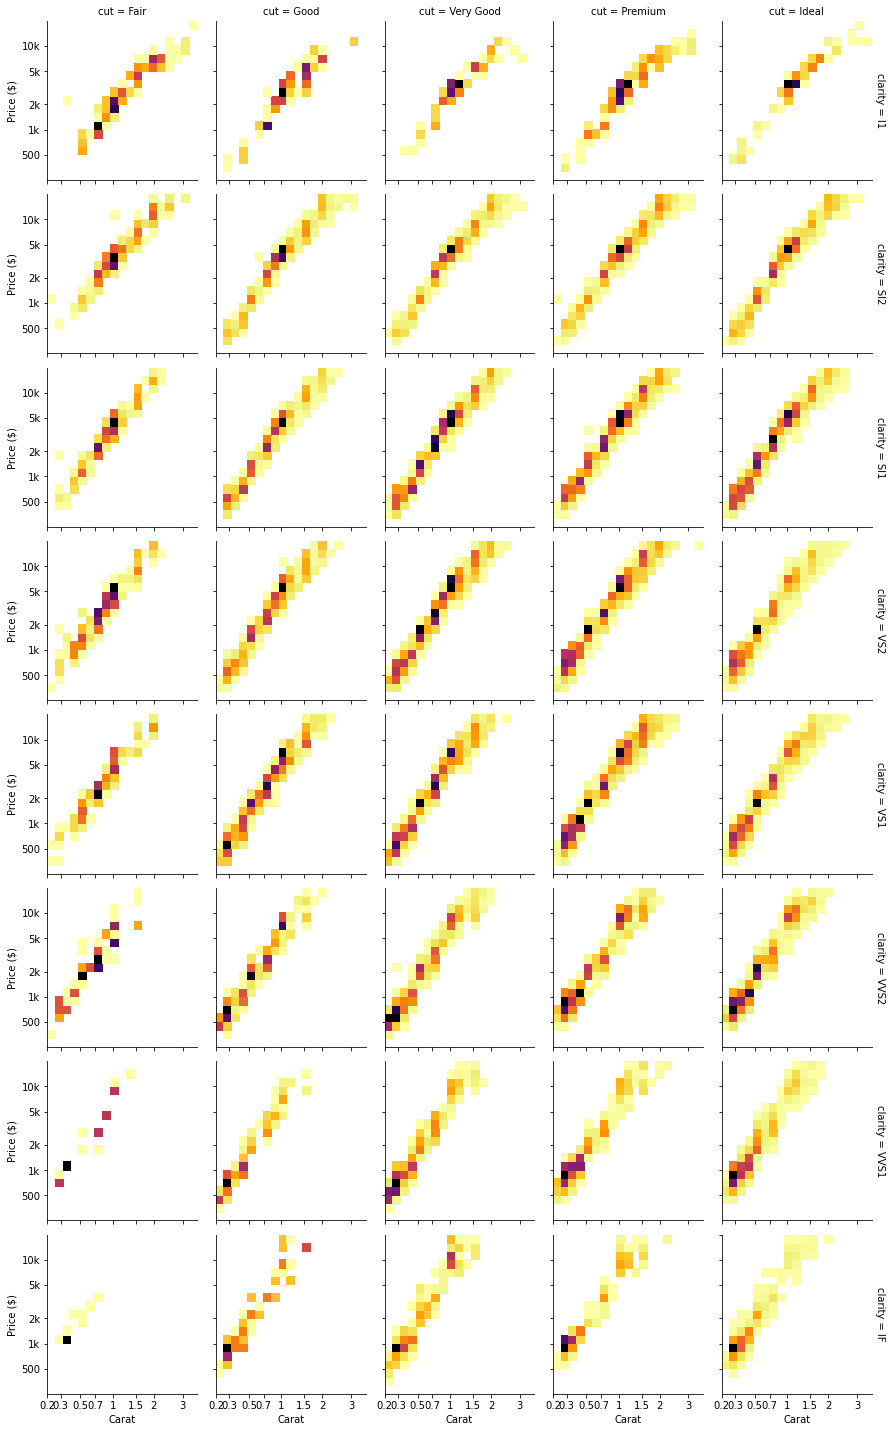

In [33]:
# create faceted heat maps on levels of cut and clarity
g = sb.FacetGrid(data = diamonds, col = 'cut', row = 'clarity', size = 2.5,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)], margin_titles = True)
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

I tried looking at a faceted heat map across two quality dimensions, but it seems like there's too many facets to look at. Perhaps a better summary can come from looking at only diamonds of a specific carat size.

In [34]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

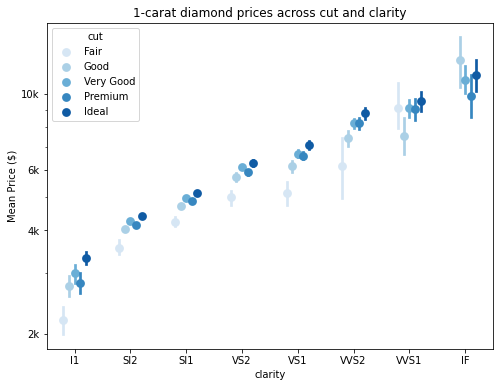

In [35]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = diamonds_1c, x = 'clarity', y = 'price', hue = 'cut',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('1-carat diamond prices across cut and clarity')
plt.ylabel('Mean Price ($)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

A dodged point plot for diamonds of approximately 1 carat in size shows the clear influence of clarity and cut on diamond price. The larger error bars on the right side are due to there being fewer diamonds at higher clarity grades at this diamond size. There also appear to be fewer diamonds of grade 'Fair' on the higher clarity grades, with none on the highest 'IF' rating.

In [36]:
# select diamonds of approximately 0.3 carat
diamond_flag = (diamonds['carat'] >= 0.29) & (diamonds['carat'] <= 0.33)
diamonds_sml = diamonds.loc[diamond_flag,:]

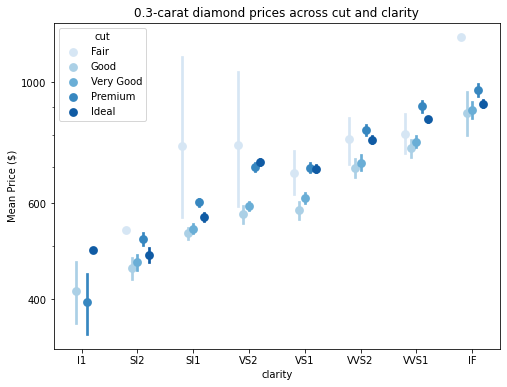

In [37]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = diamonds_sml, x = 'clarity', y = 'price', hue = 'cut',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('0.3-carat diamond prices across cut and clarity')
plt.ylabel('Mean Price ($)')
plt.yscale('log')
plt.yticks([4e2, 6e2, 1e3], ['400', '600', '1000'])
ax.set_yticklabels([],minor = True)
plt.show();

The plot is less clear for the smaller diamonds around 0.3 carat. There are few diamonds in the lower clarity grades and more on the high-clarity grades at this diamond size. Interestingly, diamonds of the 'Fair' cut grade are generally higher-priced than the 'Good' and 'Very Good' cuts, but there's no good explanation for this from this plot.

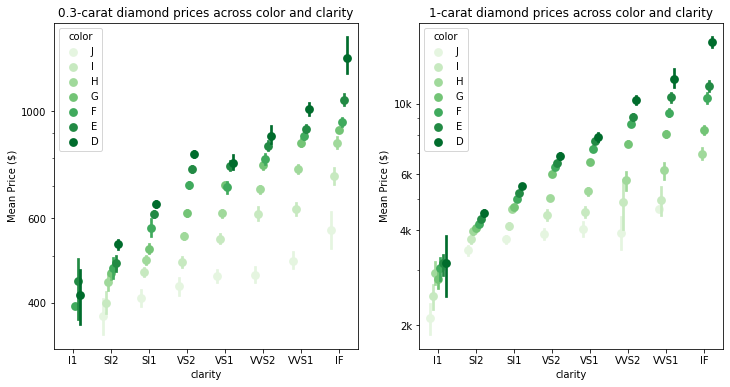

In [38]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sb.pointplot(data = diamonds_sml, x = 'clarity', y = 'price', hue = 'color',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('0.3-carat diamond prices across color and clarity')
ax[0].set_ylabel('Mean Price ($)')
ax[0].set_yscale('log')
ax[0].set_yticks([400, 600, 1000])
ax[0].set_yticklabels(['400', '600', '1000'])
ax[0].set_yticklabels([],minor = True)

sb.pointplot(data = diamonds_1c, x = 'clarity', y = 'price', hue = 'color',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('1-carat diamond prices across color and clarity')
ax[1].set_ylabel('Mean Price ($)')
ax[1].set_yscale('log')
ax[1].set_yticks([2e3, 4e3, 6e3, 1e4])
ax[1].set_yticklabels(['2k', '4k', '6k', '10k'])
ax[1].set_yticklabels([],minor = True)
plt.show();

The hierarchy in pricing by color is clear when clustered across clarity values. The pattern looks more systematic than the "cut by clarity" pointplots.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of price against diamond size in this section by looking at the impact of the three categorical quality features. The multivariate exploration here showed that there indeed is a positive effect of increased quality grade on diamond price, but in the dataset, this is initially hidden by the fact that higher grades were more prevalent in smaller diamonds, which fetch lower prices overall. Controlling for the carat weight of a diamond shows the effect of the other C's of diamonds more clearly. This effect was clearest for the color and clarity variables, with less systematic trends for cut.

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the three categorical features. However, the features also aren't fully independent. But it is interesting in something like the 1-carat plot for prices against cut and clarity, the shape of the 'cut' dots is fairly similar for the SI2 through VVS2 clarity levels.